In [54]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [55]:
# Load Data

df_2009 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2009.csv')
df_2010 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2010.csv')
df_2011 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2011.csv')
df_2012 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2012.csv')
df_2013 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2013.csv')
df_2014 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2014.csv')
df_2015 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2015.csv')
df_2016 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2016.csv')
df_2017 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2017.csv')
df_2018 = pd.read_csv('./Data/KCMO/KCPD_Crime_Data_2018.csv')

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Deal with column name inconsistencies (Thanks Ajay!)

In [56]:
# Common column list
cols = ['Report_No', 'Reported_Date', 'Reported Time', 'From_Date', 'From Time', 'To_Date', 
        'To_Time', 'Offense', 'IBRS', 'Description', 'Beat', 'Zip Code', 
        'Rep_Dist', 'Area', 'DVFlag', 'Invl_No', 'Involvement', 'Race', 'Sex', 'Age', 
        'Location', 'Firearm Used Flag', ]

In [57]:
df_2009 = df_2009.rename(columns={'Location 1':'Location', 'Firearm Used Flag  ':'Firearm Used Flag'})
df_2010 = df_2010.rename(columns={'To Time':'To_Time', 'Location 1':'Location', 'Firearm Used Flag  ':'Firearm Used Flag'})
df_2011 = df_2011.rename(columns={'To Time':'To_Time', 'Location 1':'Location', 'Firearm Used Flag  ':'Firearm Used Flag'})
df_2012 = df_2012.rename(columns={'To Time':'To_Time', 'Location 1':'Location', 'Firearm Used Flag  ':'Firearm Used Flag'})
df_2013 = df_2013.rename(columns={'To Time':'To_Time', 'Location 1':'Location', 'Firearm':'Firearm Used Flag'})
df_2014 = df_2014.rename(columns={'To Time':'To_Time', 'Location 1':'Location', 'Firearm Used Flag  ':'Firearm Used Flag'})
df_2015 = df_2015.rename(columns={'To Time':'To_Time', 'Location 1':'Location'})
df_2016 = df_2016.rename(columns={'Reported_Time':'Reported Time', 'From_Time':'From Time', 'Location 1':'Location'})
df_2017 = df_2017.rename(columns={'Reported_Time':'Reported Time', 'From_Time':'From Time'})
df_2018 = df_2018.rename(columns={'Reported_Time':'Reported Time', 'From_Time':'From Time'})

In [58]:
df_2013 = df_2013.rename(columns=lambda x: x.strip())

In [59]:
df_all = pd.concat([df_2009[cols], df_2010[cols], df_2011[cols], df_2012[cols], df_2013[cols], df_2014[cols], 
           df_2015[cols], df_2016[cols], df_2017[cols], df_2018[cols]])

In [60]:
df_all.shape

(1215557, 22)

### Build Time Series to Check for Seasonality

In [61]:
# Build DataFrame to get the number of unique reports filed per day

unique_reports = df_all.groupby('Reported_Date')['Report_No'].nunique()
df_daily_reports = pd.DataFrame(unique_reports)

In [62]:
df_daily_reports.reset_index(inplace = True)
df_daily_reports['Reported_Date'] = pd.to_datetime(df_daily_reports['Reported_Date'])

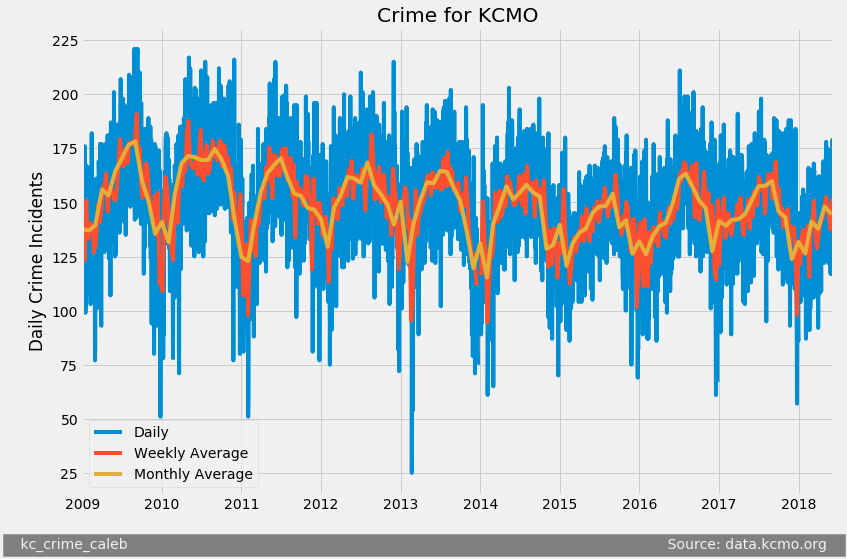

In [63]:
# Build Plot

with plt.style.context('fivethirtyeight'):
    df_daily_reports.set_index('Reported_Date').resample('D')['Report_No'].mean().plot(kind = 'line', figsize = [12,8],
                                                                         label = 'Daily')
    df_daily_reports.set_index('Reported_Date').resample('W')['Report_No'].mean().plot(kind = 'line', 
                                                                         label = 'Weekly Average')
    month_avg = df_daily_reports.set_index('Reported_Date').resample('M')['Report_No'].mean().plot(kind = 'line',
                                                                         label = 'Monthly Average')
    
    plt.legend()
    month_avg.text(x = 13900, y = -10,
    s = '   kc_crime_caleb                                                                                                                        Source: data.kcmo.org   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
    month_avg.set_title('Crime for KCMO')
    month_avg.set_ylabel('Daily Crime Incidents')
    month_avg.set_xlabel('')
    plt.show()

In [64]:
df_all.head()

,Report_No,Reported_Date,Reported Time,From_Date,From Time,To_Date,To_Time,Offense,IBRS,Description,...,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Location,Firearm Used Flag
0,70059279,10/06/2009,3:24,10/05/2009,22:56,10/05/2009 12:00:00 AM,23:10,1850,35B,Possession of Drug E,...,PJ2327,EPD,U,1,ARR,B,F,28.0,"PROSPECT AV VICTOR ST KANSAS CITY, MO 64128\n(...",N
1,80005443,02/05/2009,11:45,01/22/2008,12:00,NaN,NaN,121,09C,Justifiable Homicide,...,PJ1029,CPD,U,1,SUS,W,M,27.0,"1100 LOCUST ST\nKANSAS CITY, MO 64106\n(39.100...",Y
2,80019629,06/18/2009,22:50,06/18/2009,21:15,NaN,NaN,1849,35A,Possession/Sale/Dist,...,PJ0371,EPD,U,1,ARR,W,M,22.0,"100 WHEELING AV\nKANSAS CITY, MO 64129\n(39.11...",N
3,70060962,01/28/2009,18:44,01/28/2009,18:44,NaN,NaN,1352,280,Stolen Property OFFE,...,PJ3525,EPD,U,1,VIC,U,U,NaN,"44 ST INDIANA AV\nKANSAS CITY, MO 64130\n(39.0...",N
4,80005443,02/05/2009,11:45,01/22/2008,12:00,NaN,NaN,121,09C,Justifiable Homicide,...,PJ1029,CPD,U,2,SUS,W,M,28.0,"1100 LOCUST ST\nKANSAS CITY, MO 64106\n(39.100...",Y


In [65]:
df_daily_reports.columns = ['Reported_Date', 'Count']

In [66]:
df_daily_reports['Month'] = df_daily_reports['Reported_Date'].dt.month

In [67]:
df_daily_reports['Day'] = df_daily_reports['Reported_Date'].dt.day

In [68]:
df_daily_reports['weekday'] = df_daily_reports['Reported_Date'].dt.dayofweek

In [69]:
df_daily_reports.head()

,Reported_Date,Count,Month,Day,weekday
0,2009-01-01,149,1,1,3
1,2010-01-01,153,1,1,4
2,2011-01-01,158,1,1,5
3,2012-01-01,160,1,1,6
4,2013-01-01,124,1,1,1


### Reports by Month

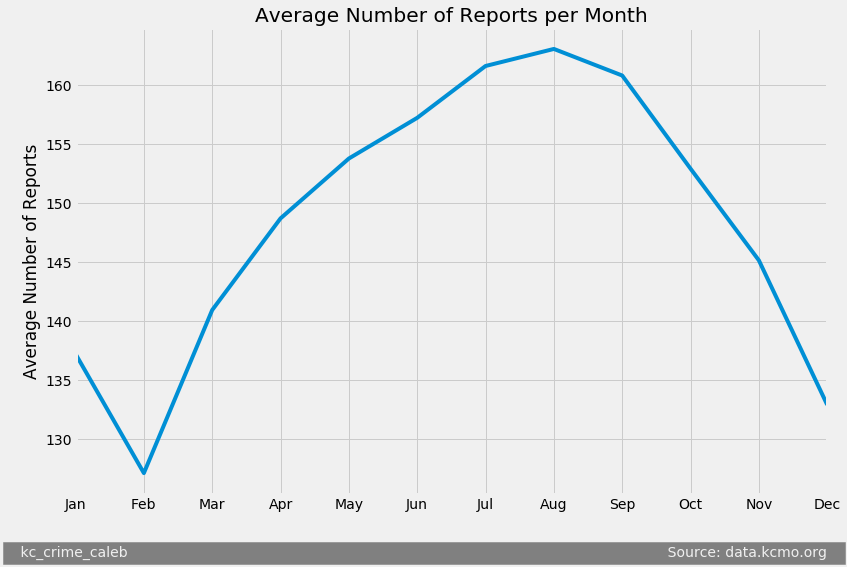

In [70]:
with plt.style.context('fivethirtyeight'):
    by_month = df_daily_reports.groupby('Month')['Count'].mean().plot(kind = 'line', figsize = [12, 8])
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xlabel('')
    plt.ylabel('Average Number of Reports')
    plt.title('Average Number of Reports per Month')
    by_month.text(x = 0, y = 120,
    s = '   kc_crime_caleb                                                                                                                        Source: data.kcmo.org   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
    plt.show()

### Reports by Day of Month

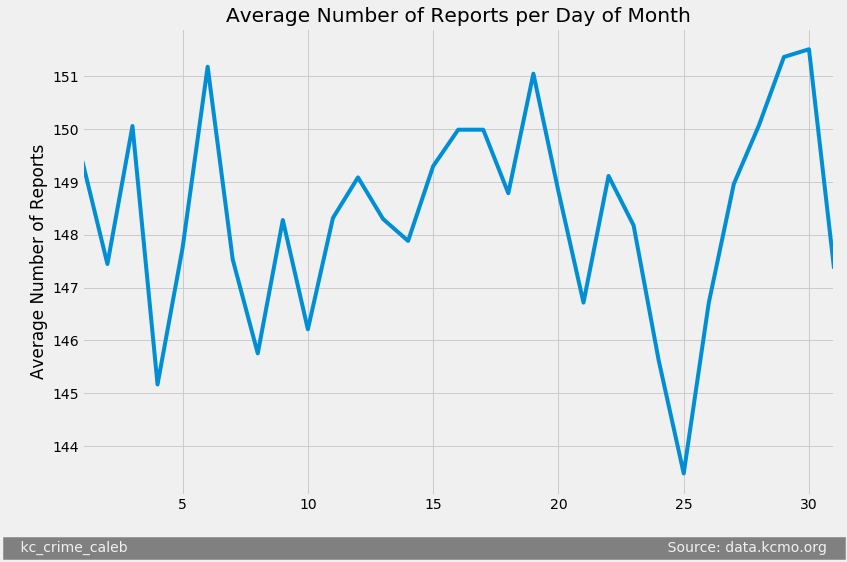

In [71]:
with plt.style.context('fivethirtyeight'):
    dom = df_daily_reports.groupby('Day')['Count'].mean().plot(kind = 'line', figsize = (12, 8))
    plt.xlabel('')
    plt.ylabel('Average Number of Reports')
    plt.title('Average Number of Reports per Day of Month')
    dom.text(x = -2, y = 142,
    s = '   kc_crime_caleb                                                                                                                        Source: data.kcmo.org   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
    plt.show()

In [72]:
df_daily_reports[(df_daily_reports['Day'] == 25) & (df_daily_reports['Month'] == 12)]['Count'].mean()

67.875

### Number of Reports by Weekday

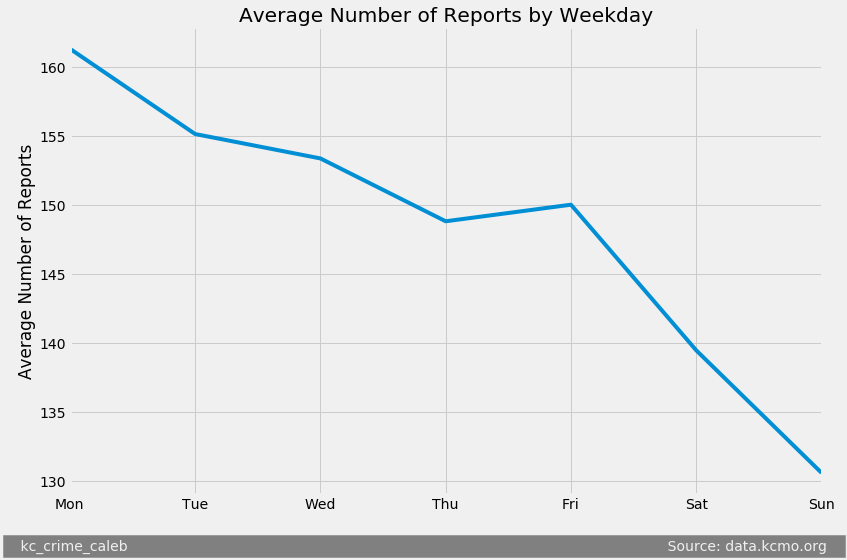

In [73]:
# Monday 0 Sunday 6

with plt.style.context('fivethirtyeight'):
    weekday = df_daily_reports.groupby('weekday')['Count'].mean().plot(kind = 'line', figsize = [12, 8])
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.xlabel('')
    plt.ylabel('Average Number of Reports')
    plt.title('Average Number of Reports by Weekday')
    weekday.text(x = -.5, y = 125,
    s = '   kc_crime_caleb                                                                                                                        Source: data.kcmo.org   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
    plt.show()

In [74]:
df_all.head()

,Report_No,Reported_Date,Reported Time,From_Date,From Time,To_Date,To_Time,Offense,IBRS,Description,...,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Location,Firearm Used Flag
0,70059279,10/06/2009,3:24,10/05/2009,22:56,10/05/2009 12:00:00 AM,23:10,1850,35B,Possession of Drug E,...,PJ2327,EPD,U,1,ARR,B,F,28.0,"PROSPECT AV VICTOR ST KANSAS CITY, MO 64128\n(...",N
1,80005443,02/05/2009,11:45,01/22/2008,12:00,NaN,NaN,121,09C,Justifiable Homicide,...,PJ1029,CPD,U,1,SUS,W,M,27.0,"1100 LOCUST ST\nKANSAS CITY, MO 64106\n(39.100...",Y
2,80019629,06/18/2009,22:50,06/18/2009,21:15,NaN,NaN,1849,35A,Possession/Sale/Dist,...,PJ0371,EPD,U,1,ARR,W,M,22.0,"100 WHEELING AV\nKANSAS CITY, MO 64129\n(39.11...",N
3,70060962,01/28/2009,18:44,01/28/2009,18:44,NaN,NaN,1352,280,Stolen Property OFFE,...,PJ3525,EPD,U,1,VIC,U,U,NaN,"44 ST INDIANA AV\nKANSAS CITY, MO 64130\n(39.0...",N
4,80005443,02/05/2009,11:45,01/22/2008,12:00,NaN,NaN,121,09C,Justifiable Homicide,...,PJ1029,CPD,U,2,SUS,W,M,28.0,"1100 LOCUST ST\nKANSAS CITY, MO 64106\n(39.100...",Y


In [75]:
df_all.isnull().sum()

Report_No                 0
Reported_Date             0
Reported Time             0
From_Date              1835
From Time              2753
To_Date              742465
To_Time              718972
Offense                   0
IBRS                  10264
Description               0
Beat                   3195
Zip Code              22893
Rep_Dist               4552
Area                   4579
DVFlag                    0
Invl_No                   0
Involvement               0
Race                 161563
Sex                  161563
Age                  535741
Location                637
Firearm Used Flag         0
dtype: int64

In [76]:
# Grab Time

df_time = df_all.dropna(subset = ['From Time'])

In [77]:
df_time['Reported_Date'] = pd.to_datetime(df_time['Reported_Date'])

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
df_time['Month'] = df_time['Reported_Date'].dt.month

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
df_time[['Hour','Minute', 'Seconds']] = df_time['From Time'].str.split(':',expand=True)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [80]:
# Convert Hours to Integer
df_time['Hour'] = df_time['Hour'].astype(int)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Number of Reports by Hour

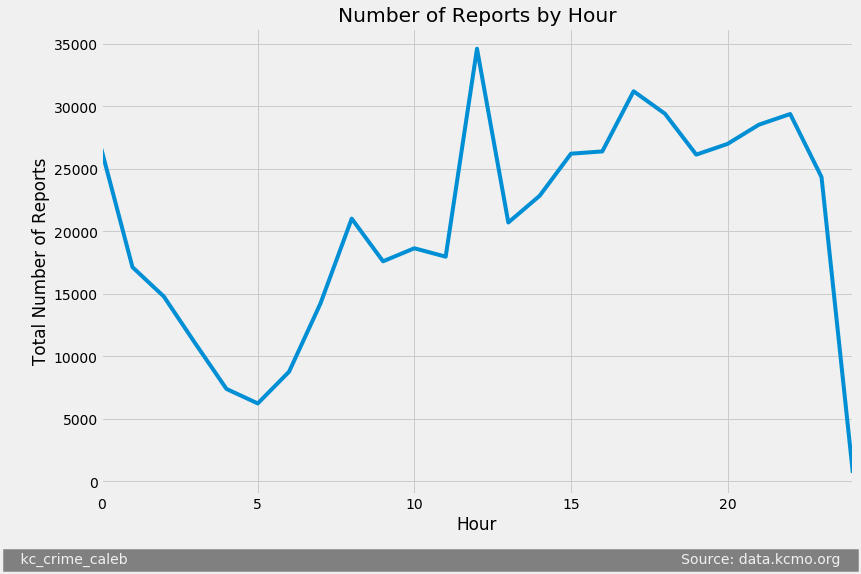

In [81]:
with plt.style.context('fivethirtyeight'):
    by_time = df_time.groupby('Hour')['Report_No'].nunique().plot(kind = 'line', figsize = [12, 8])
    plt.ylabel('Total Number of Reports')
    plt.title('Number of Reports by Hour')
    by_time.text(x = -3, y = -6570,
    s = '   kc_crime_caleb                                                                                                                           Source: data.kcmo.org   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
    plt.show()

In [82]:
df_prophet = df_daily_reports[['Reported_Date', 'Count']]
df_prophet.columns = ['ds', 'y']

### Prophet

Prophet is a time series forecast released by Facebook research.  Comparable to ARIMA and exponential smoothing.  Broken into 4 parts:
1. Overall Trend
2. Yearly Trend
3. Weekly Trend
4. User provided list of holidays

In [83]:
from fbprophet import Prophet

In [84]:
m = Prophet()

In [85]:
m.fit(df_prophet)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
future = m.make_future_dataframe(periods=365)

In [87]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3793,2019-06-06,153.035079,130.262544,177.309474
3794,2019-06-07,154.521885,133.297644,177.664435
3795,2019-06-08,144.254268,120.056240,166.687336
3796,2019-06-09,135.729411,111.276373,158.182195
3797,2019-06-10,166.674904,144.122164,188.852102


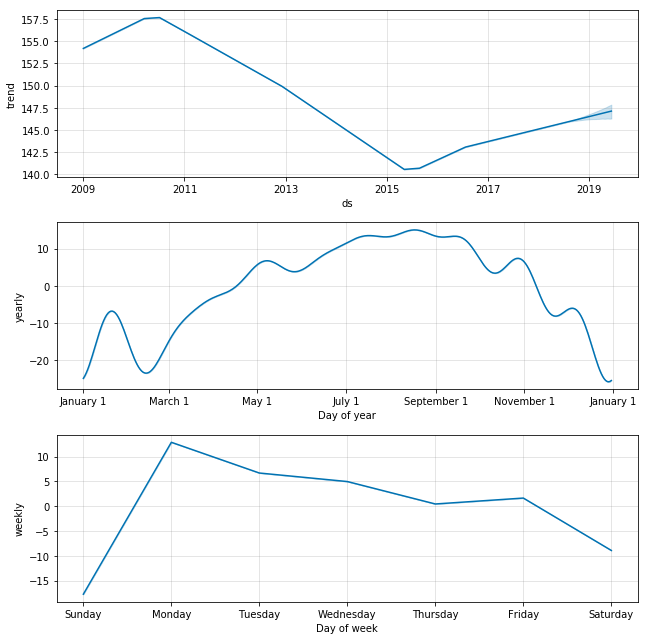

In [88]:
fig2 = m.plot_components(forecast)
plt.show()

In [89]:
resid1 = pd.merge(forecast, df_prophet, on = 'ds', how = 'left')

In [90]:
resid1.dropna(inplace = True)

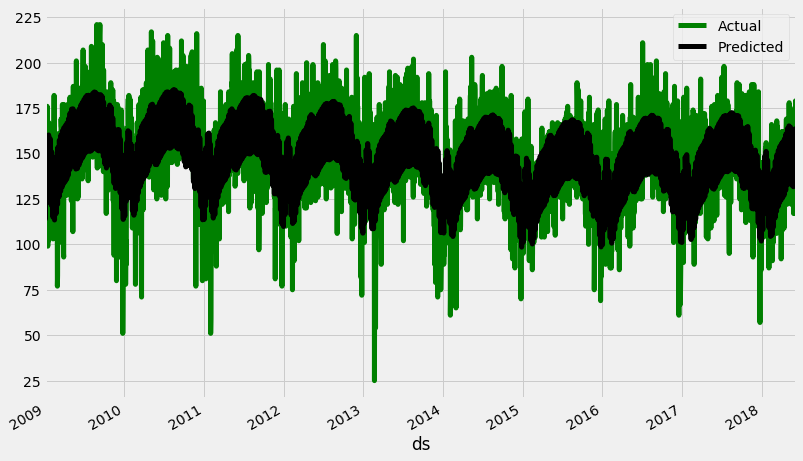

In [91]:
with plt.style.context('fivethirtyeight'):
    resid1.set_index('ds')['y'].plot(kind = 'line', label = 'Actual', figsize = [12, 8], lw = 5, color = 'green')
    resid1.set_index('ds')['yhat'].plot(kind = 'line', label = 'Predicted', figsize = [12, 8], lw = 5, color = 'black')
    plt.legend()
    plt.show()

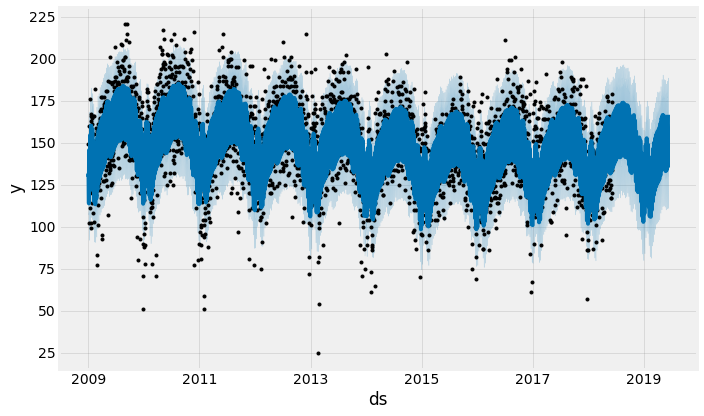

In [92]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12, 8))
    fig1 = m.plot(forecast)
    plt.show()

In [93]:
df_prophet.sort_values('ds', inplace = True)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_prophet.set_index('ds', inplace = True)

In [95]:
df_prophet.tail()

,y
ds,
2018-06-06,179
2018-06-07,153
2018-06-08,154
2018-06-09,120
2018-06-10,134


In [96]:
df_prophet_train = df_prophet['2009-01-01':'2017-06-10']
df_prophet_test = df_prophet['2017-06-11':]

### Train, Test Split

In [97]:
df_prophet_train.shape, df_prophet_test.shape, df_prophet.shape

((3068, 1), (365, 1), (3433, 1))

In [98]:
df_prophet_train.reset_index(inplace = True)

In [99]:
# Fit on Training Data
m_tt = Prophet()
m_tt.fit(df_prophet_train)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
future = m_tt.make_future_dataframe(periods=365)
forecast = m_tt.predict(future)

In [101]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
3428,2018-06-06,153.193766,152.204959,154.118738,139.652651,184.969767,10.316780,10.316780,10.316780,10.316780,10.316780,10.316780,4.756986,4.756986,4.756986,5.559794,5.559794,5.559794,163.510546
3429,2018-06-07,153.207201,152.215471,154.134110,136.258680,182.203956,5.858325,5.858325,5.858325,5.858325,5.858325,5.858325,0.033571,0.033571,0.033571,5.824754,5.824754,5.824754,159.065526
3430,2018-06-08,153.220636,152.224747,154.147815,138.326178,183.988561,7.894932,7.894932,7.894932,7.894932,7.894932,7.894932,1.794499,1.794499,1.794499,6.100434,6.100434,6.100434,161.115568
3431,2018-06-09,153.234071,152.232953,154.162694,127.260914,174.826651,-2.106969,-2.106969,-2.106969,-2.106969,-2.106969,-2.106969,-8.490593,-8.490593,-8.490593,6.383623,6.383623,6.383623,151.127102
3432,2018-06-10,153.247507,152.241787,154.180057,117.985623,165.755136,-11.068486,-11.068486,-11.068486,-11.068486,-11.068486,-11.068486,-17.739779,-17.739779,-17.739779,6.671293,6.671293,6.671293,142.179020


In [102]:
resid = forecast.tail(365)

In [103]:
df_prophet_test.reset_index(inplace = True)

In [104]:
resid = pd.merge(resid, df_prophet_test, on = 'ds', how = 'left')

In [105]:
resid.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,y
0,2017-06-11,148.357058,148.357058,148.357058,115.396594,160.039534,-10.706817,-10.706817,-10.706817,-10.706817,-10.706817,-10.706817,-17.739779,-17.739779,-17.739779,7.032962,7.032962,7.032962,137.650241,133
1,2017-06-12,148.370493,148.370493,148.370493,146.640479,190.958701,20.351424,20.351424,20.351424,20.351424,20.351424,20.351424,13.030440,13.030440,13.030440,7.320984,7.320984,7.320984,168.721917,154
2,2017-06-13,148.383929,148.383929,148.383929,140.191313,185.290751,14.220463,14.220463,14.220463,14.220463,14.220463,14.220463,6.614875,6.614875,6.614875,7.605588,7.605588,7.605588,162.604392,152
3,2017-06-14,148.397364,148.397364,148.397364,138.277465,184.374453,12.642078,12.642078,12.642078,12.642078,12.642078,12.642078,4.756986,4.756986,4.756986,7.885092,7.885092,7.885092,161.039442,182
4,2017-06-15,148.410799,148.410799,148.410799,133.006895,179.427789,8.191767,8.191767,8.191767,8.191767,8.191767,8.191767,0.033571,0.033571,0.033571,8.158196,8.158196,8.158196,156.602567,156


In [106]:
resid['Residual'] = resid['y'] - resid['yhat']

In [107]:
resid['Error^2'] = resid['Residual'] ** 2

In [108]:
resid.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,y,Residual,Error^2
0,2017-06-11,148.357058,148.357058,148.357058,115.396594,160.039534,-10.706817,-10.706817,-10.706817,-10.706817,...,-17.739779,-17.739779,-17.739779,7.032962,7.032962,7.032962,137.650241,133,-4.650241,21.624738
1,2017-06-12,148.370493,148.370493,148.370493,146.640479,190.958701,20.351424,20.351424,20.351424,20.351424,...,13.030440,13.030440,13.030440,7.320984,7.320984,7.320984,168.721917,154,-14.721917,216.734840
2,2017-06-13,148.383929,148.383929,148.383929,140.191313,185.290751,14.220463,14.220463,14.220463,14.220463,...,6.614875,6.614875,6.614875,7.605588,7.605588,7.605588,162.604392,152,-10.604392,112.453131
3,2017-06-14,148.397364,148.397364,148.397364,138.277465,184.374453,12.642078,12.642078,12.642078,12.642078,...,4.756986,4.756986,4.756986,7.885092,7.885092,7.885092,161.039442,182,20.960558,439.344979
4,2017-06-15,148.410799,148.410799,148.410799,133.006895,179.427789,8.191767,8.191767,8.191767,8.191767,...,0.033571,0.033571,0.033571,8.158196,8.158196,8.158196,156.602567,156,-0.602567,0.363086


#### RMSE

In [109]:
(resid['Error^2'].mean()) ** .5

17.225449326374104

In [110]:
import numpy as np
from statsmodels.graphics.gofplots import qqplot

In [111]:
resid.sort_values('y').head(10)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,y,Residual,Error^2
197,2017-12-25,151.003812,150.609665,151.343110,118.335531,162.886815,-10.739012,-10.739012,-10.739012,-10.739012,...,13.030440,13.030440,13.030440,-23.769451,-23.769451,-23.769451,140.264800,57,-83.264800,6933.026973
203,2017-12-31,151.084424,150.665298,151.435833,86.241258,131.551277,-42.454169,-42.454169,-42.454169,-42.454169,...,-17.739779,-17.739779,-17.739779,-24.714390,-24.714390,-24.714390,108.630254,86,-22.630254,512.128409
196,2017-12-24,150.990377,150.598198,151.326567,88.055153,133.813543,-40.781317,-40.781317,-40.781317,-40.781317,...,-17.739779,-17.739779,-17.739779,-23.041538,-23.041538,-23.041538,110.209060,86,-24.209060,586.078563
238,2018-02-04,151.554659,151.017254,152.011671,92.215816,138.485606,-36.418057,-36.418057,-36.418057,-36.418057,...,-17.739779,-17.739779,-17.739779,-18.678278,-18.678278,-18.678278,115.136602,87,-28.136602,791.668361
254,2018-02-20,151.769624,151.172228,152.278740,112.097585,160.320583,-15.597840,-15.597840,-15.597840,-15.597840,...,6.614875,6.614875,6.614875,-22.212716,-22.212716,-22.212716,136.171784,91,-45.171784,2040.490034
294,2018-04-01,152.307036,151.559433,152.960405,109.001976,154.496372,-20.362748,-20.362748,-20.362748,-20.362748,...,-17.739779,-17.739779,-17.739779,-2.622969,-2.622969,-2.622969,131.944287,92,-39.944287,1595.546102
202,2017-12-30,151.070988,150.658310,151.419962,93.772510,142.007772,-33.482168,-33.482168,-33.482168,-33.482168,...,-8.490593,-8.490593,-8.490593,-24.991575,-24.991575,-24.991575,117.588820,92,-25.588820,654.787724
165,2017-11-23,150.573882,150.271276,150.805624,120.578259,164.624661,-8.322504,-8.322504,-8.322504,-8.322504,...,0.033571,0.033571,0.033571,-8.356075,-8.356075,-8.356075,142.251379,93,-49.251379,2425.698306
56,2017-08-06,149.109435,149.079697,149.127017,123.300497,168.989737,-3.003607,-3.003607,-3.003607,-3.003607,...,-17.739779,-17.739779,-17.739779,14.736172,14.736172,14.736172,146.105827,95,-51.105827,2611.805585
195,2017-12-23,150.976941,150.587131,151.308176,97.062580,144.487067,-30.670874,-30.670874,-30.670874,-30.670874,...,-8.490593,-8.490593,-8.490593,-22.180281,-22.180281,-22.180281,120.306067,97,-23.306067,543.172775


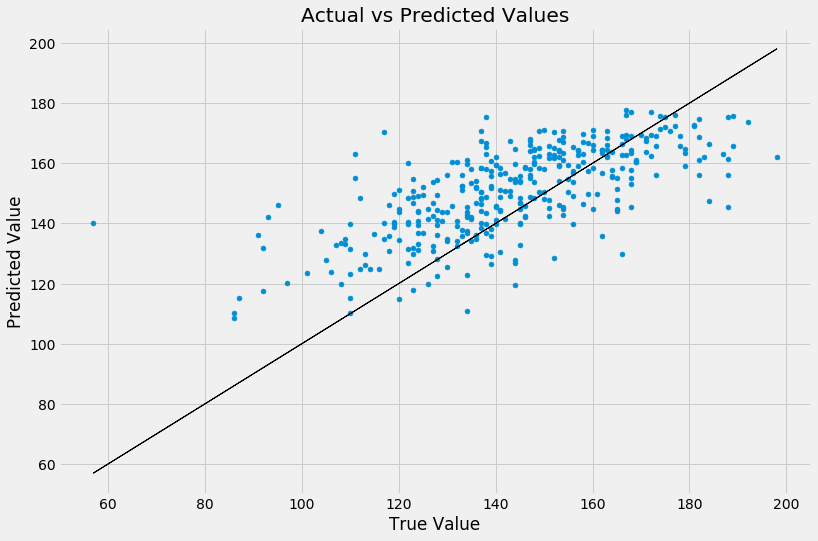

In [112]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (12, 8))
    plt.scatter(resid['y'], resid['yhat'], alpha = 1, s=25)
    plt.plot(resid['y'], resid['y'], color = 'k', lw= 1)
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.title('Actual vs Predicted Values')
    plt.show()

In [113]:
resid.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,y,Residual,Error^2
0,2017-06-11,148.357058,148.357058,148.357058,115.396594,160.039534,-10.706817,-10.706817,-10.706817,-10.706817,...,-17.739779,-17.739779,-17.739779,7.032962,7.032962,7.032962,137.650241,133,-4.650241,21.624738
1,2017-06-12,148.370493,148.370493,148.370493,146.640479,190.958701,20.351424,20.351424,20.351424,20.351424,...,13.030440,13.030440,13.030440,7.320984,7.320984,7.320984,168.721917,154,-14.721917,216.734840
2,2017-06-13,148.383929,148.383929,148.383929,140.191313,185.290751,14.220463,14.220463,14.220463,14.220463,...,6.614875,6.614875,6.614875,7.605588,7.605588,7.605588,162.604392,152,-10.604392,112.453131
3,2017-06-14,148.397364,148.397364,148.397364,138.277465,184.374453,12.642078,12.642078,12.642078,12.642078,...,4.756986,4.756986,4.756986,7.885092,7.885092,7.885092,161.039442,182,20.960558,439.344979
4,2017-06-15,148.410799,148.410799,148.410799,133.006895,179.427789,8.191767,8.191767,8.191767,8.191767,...,0.033571,0.033571,0.033571,8.158196,8.158196,8.158196,156.602567,156,-0.602567,0.363086


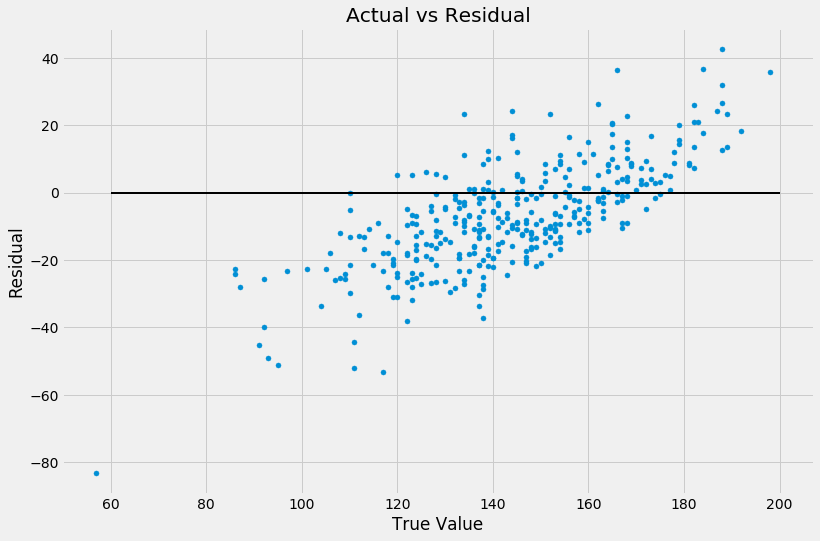

In [114]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (12, 8))
    plt.scatter(resid['y'], resid['Residual'], alpha = 1, s=25)
    plt.hlines(y = 0, xmin = 60, xmax = 200, lw = 2)
    plt.xlabel('True Value')
    plt.ylabel('Residual')
    plt.title('Actual vs Residual')
    plt.show()

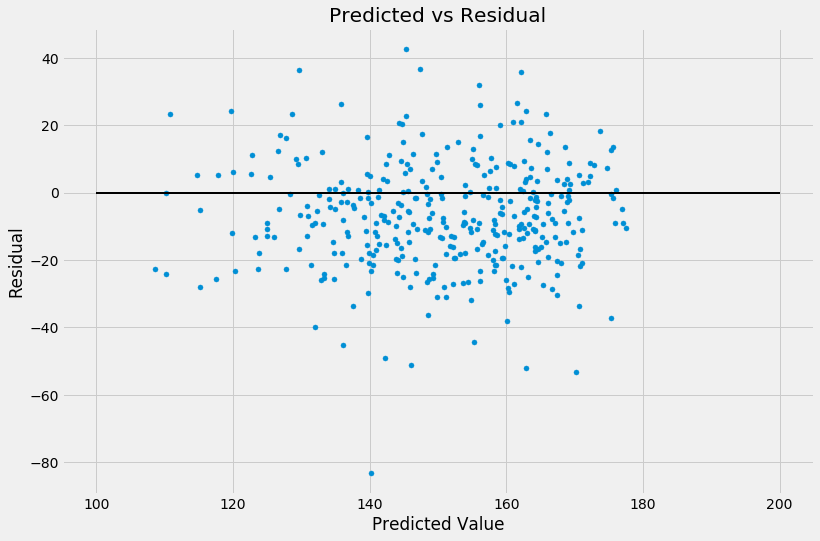

In [115]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (12, 8))
    plt.scatter(resid['yhat'], resid['Residual'], alpha = 1, s=25)
    plt.hlines(y = 0, xmin = 100, xmax = 200, lw = 2)
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual')
    plt.title('Predicted vs Residual')
    plt.show()

In [116]:
resid.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,y,Residual,Error^2
0,2017-06-11,148.357058,148.357058,148.357058,115.396594,160.039534,-10.706817,-10.706817,-10.706817,-10.706817,...,-17.739779,-17.739779,-17.739779,7.032962,7.032962,7.032962,137.650241,133,-4.650241,21.624738
1,2017-06-12,148.370493,148.370493,148.370493,146.640479,190.958701,20.351424,20.351424,20.351424,20.351424,...,13.030440,13.030440,13.030440,7.320984,7.320984,7.320984,168.721917,154,-14.721917,216.734840
2,2017-06-13,148.383929,148.383929,148.383929,140.191313,185.290751,14.220463,14.220463,14.220463,14.220463,...,6.614875,6.614875,6.614875,7.605588,7.605588,7.605588,162.604392,152,-10.604392,112.453131
3,2017-06-14,148.397364,148.397364,148.397364,138.277465,184.374453,12.642078,12.642078,12.642078,12.642078,...,4.756986,4.756986,4.756986,7.885092,7.885092,7.885092,161.039442,182,20.960558,439.344979
4,2017-06-15,148.410799,148.410799,148.410799,133.006895,179.427789,8.191767,8.191767,8.191767,8.191767,...,0.033571,0.033571,0.033571,8.158196,8.158196,8.158196,156.602567,156,-0.602567,0.363086


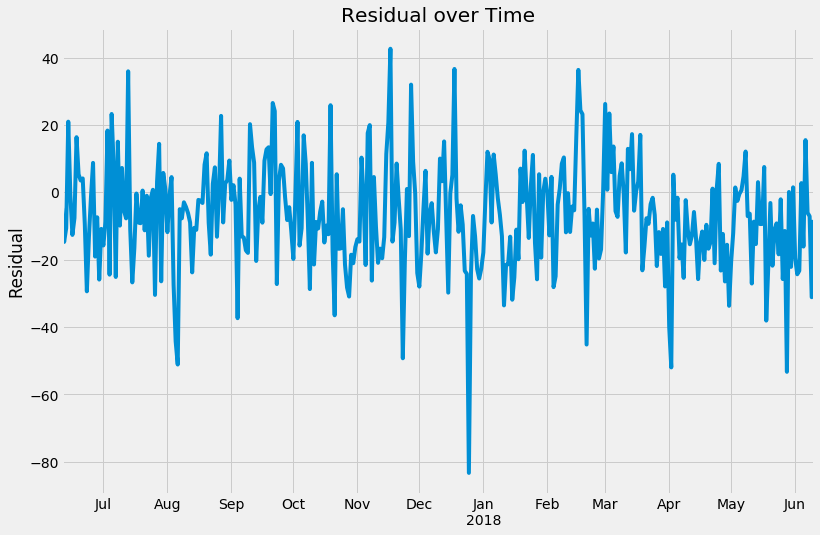

In [117]:
with plt.style.context('fivethirtyeight'):
    resid.set_index('ds')['Residual'].plot(kind = 'line', figsize = (12, 8))
    plt.title('Residual over Time')
    plt.ylabel('Residual')
    plt.xlabel('')
    plt.show()

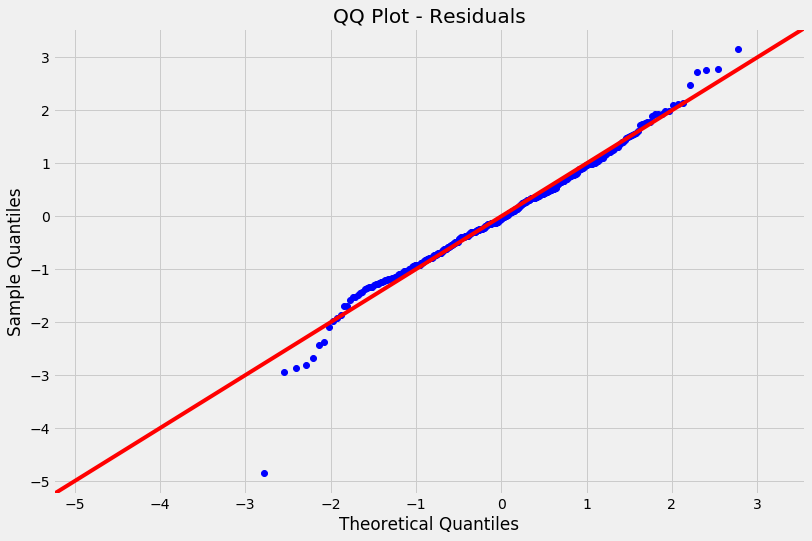

In [125]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(12, 8))
    residuals = np.array(resid['Residual'].values)
    qqplot(residuals, ax = ax, fit = True, line = '45')
    plt.title('QQ Plot - Residuals')
    plt.show()

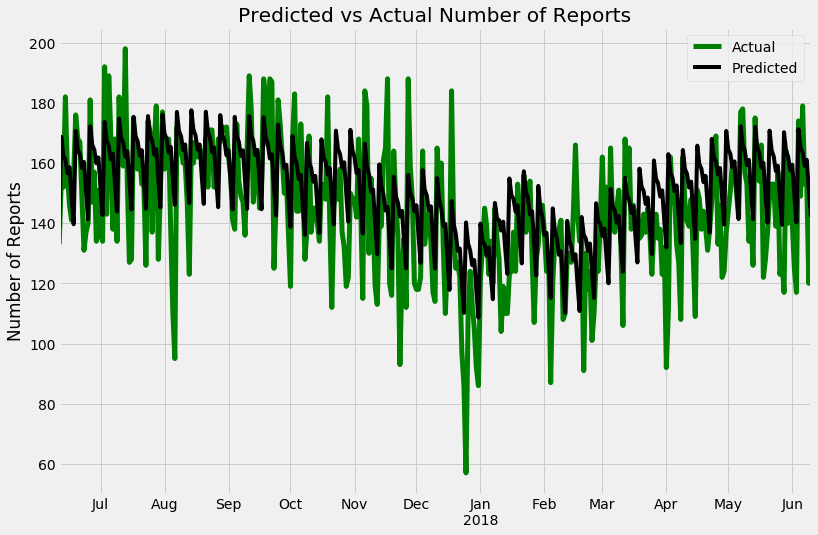

In [119]:
with plt.style.context('fivethirtyeight'):
    resid.set_index('ds')['y'].plot(kind = 'line', label = 'Actual', figsize = [12, 8], lw = 5, color = 'green')
    resid.set_index('ds')['yhat'].plot(kind = 'line', label = 'Predicted', color = 'k')
    plt.legend()
    plt.ylabel('Number of Reports')
    plt.xlabel('')
    plt.title('Predicted vs Actual Number of Reports')
    by_time.text(x = -3, y = -6570,
    s = '   kc_crime_caleb                                                                                                                           Source: data.kcmo.org   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
    plt.savefig('Predicted_vs_Actual')
    plt.show()

In [120]:
resid.sort_values('Error^2', ascending = False).head(10)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,y,Residual,Error^2
197,2017-12-25,151.003812,150.609665,151.343110,118.335531,162.886815,-10.739012,-10.739012,-10.739012,-10.739012,...,13.030440,13.030440,13.030440,-23.769451,-23.769451,-23.769451,140.264800,57,-83.264800,6933.026973
351,2018-05-28,153.072848,152.113796,153.955471,147.274436,192.489874,17.196165,17.196165,17.196165,17.196165,...,13.030440,13.030440,13.030440,4.165725,4.165725,4.165725,170.269013,117,-53.269013,2837.587734
295,2018-04-02,152.320471,151.569670,152.978595,138.923930,186.005428,10.639900,10.639900,10.639900,10.639900,...,13.030440,13.030440,13.030440,-2.390540,-2.390540,-2.390540,162.960371,111,-51.960371,2699.880190
56,2017-08-06,149.109435,149.079697,149.127017,123.300497,168.989737,-3.003607,-3.003607,-3.003607,-3.003607,...,-17.739779,-17.739779,-17.739779,14.736172,14.736172,14.736172,146.105827,95,-51.105827,2611.805585
165,2017-11-23,150.573882,150.271276,150.805624,120.578259,164.624661,-8.322504,-8.322504,-8.322504,-8.322504,...,0.033571,0.033571,0.033571,-8.356075,-8.356075,-8.356075,142.251379,93,-49.251379,2425.698306
254,2018-02-20,151.769624,151.172228,152.278740,112.097585,160.320583,-15.597840,-15.597840,-15.597840,-15.597840,...,6.614875,6.614875,6.614875,-22.212716,-22.212716,-22.212716,136.171784,91,-45.171784,2040.490034
55,2017-08-05,149.095999,149.067349,149.112966,132.116128,179.418356,6.127363,6.127363,6.127363,6.127363,...,-8.490593,-8.490593,-8.490593,14.617955,14.617955,14.617955,155.223362,111,-44.223362,1955.705755
159,2017-11-17,150.493271,150.209053,150.706134,122.011572,168.594855,-5.096294,-5.096294,-5.096294,-5.096294,...,1.794499,1.794499,1.794499,-6.890792,-6.890792,-6.890792,145.396977,188,42.603023,1815.017568
294,2018-04-01,152.307036,151.559433,152.960405,109.001976,154.496372,-20.362748,-20.362748,-20.362748,-20.362748,...,-17.739779,-17.739779,-17.739779,-2.622969,-2.622969,-2.622969,131.944287,92,-39.944287,1595.546102
341,2018-05-18,152.938495,152.017275,153.787006,135.344224,184.183409,7.130090,7.130090,7.130090,7.130090,...,1.794499,1.794499,1.794499,5.335592,5.335592,5.335592,160.068585,122,-38.068585,1449.217176


Christmas, Memorial Day, Easter, Thanksgiving

### Next Steps
1. Make list of holidays
2. Test versus other models